In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

In [2]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')

### Stations where I calculated $N^2$

Scripts **`get_N2.py`** nad **get_N.py**, calculate $N^2$ and $N, respectively$ everyday at the following stations and saves the whole profile in a csv file using pandas. I ran it for all experiments with a canyon. There are two peaks in the calculation, one below 150 m and the other one around 250 m. These are where the vertical resolution changes and when I calculated the derivative $d\rho/dz$ I got these spikes.

In [3]:
# Set necessary grid variables and grid file
grid = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
rc = grid.RC

# station locations
ys = [262,220,262,227,245,245,262,220,100]
xs = [60,60,180,180,160,200,300,300,180]

station_names = ['UpSh','UpSl','CH','CM','UpC','DnC','DnSh','DnSl','CO']

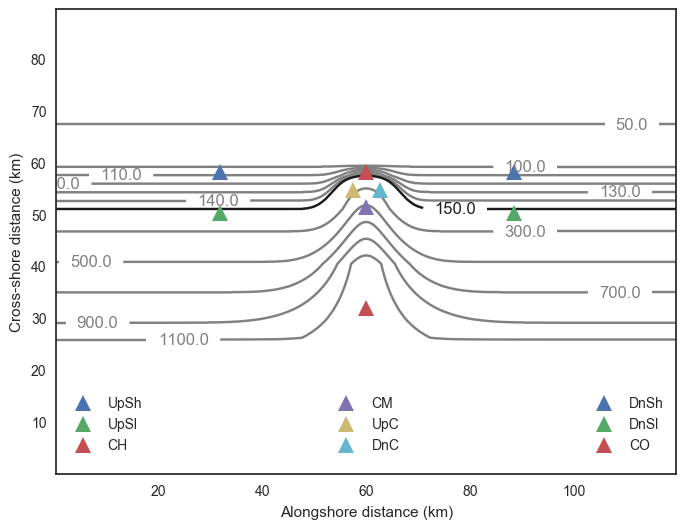

In [4]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

cntr = ax.contour(grid.X/1000,grid.Y/1000,grid.Depth,
                  [50,100,110,120,130,140,150,300,500,700,900,1100],
                  colors=['0.5','0.5','0.5','0.5','0.5','0.5','0.1','0.5','0.5','0.5','0.5','0.5','0.5'])
ax.clabel(cntr,fmt='%0.1f')

sns.set_palette('Paired',9)
for x,y,stn_name in zip(xs,ys,station_names):
    ax.plot(grid.X[x]/1000,grid.Y[y]/1000,'^',markersize=12,label=stn_name)

ax.legend(bbox_to_anchor=(0., 0.02, 1., .102), loc=8,ncol=3, mode="expand")
ax.set_xlabel('Alongshore distance (km)')
ax.set_ylabel('Cross-shore distance (km)')

<xarray.DataArray 'Z' ()>
array(-112.5)
Coordinates:
    Z        float64 -112.5
Attributes:
    long_name: vertical coordinate of cell center
    units: meters
    positive: up


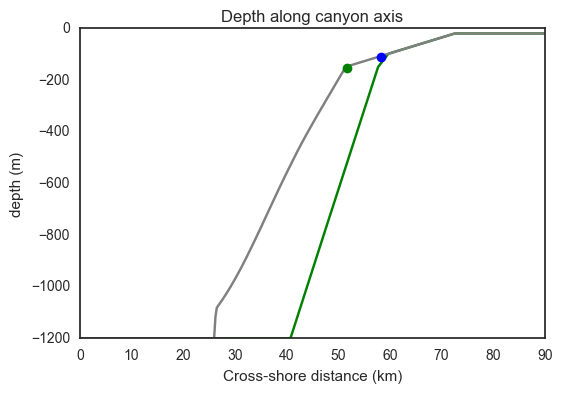

In [5]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(grid.YC[:,180]/1000,-grid.Depth[:,180],'g-')
ax.plot(grid.YC[:,100]/1000,-grid.Depth[:,100],'-',color='grey')
ax.plot(grid.YC[227,100]/1000,grid.Z[30],'go')  
ax.plot(grid.YC[262,100]/1000,grid.Z[22],'bo')  
ax.set_title('Depth along canyon axis')
ax.set_ylabel('depth (m)')
ax.set_xlabel('Cross-shore distance (km)')

print(grid.Z[22])

In [6]:
def plotN_profile(ax,st,expNames,col_pal,key,key0):
    
    sns.set_palette(col_pal)
    
    for runs in expNames:
        
        filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,st))
        df = pd.read_csv(filename1)
        df_anom=df.sub(df[key0].squeeze(),axis=0)
        
        ax.plot(df_anom[key],rc[1:-1],label=runs)
        ax.plot(df_anom[key0],rc[1:-1],'--',color='grey',label='')
        ax.axhline(rc[30],linestyle='--',color='0.6')
        ax.axhline(rc[27],linestyle='--',color='0.6')
        ax.set_title('%s,%s' %(key, st))
        ax.set_xlabel('$N-N_0$ ($s^{-1}$)')
        ax.set_ylabel('depth (m)')


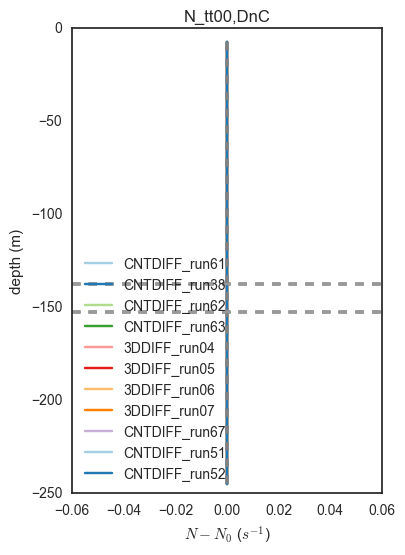

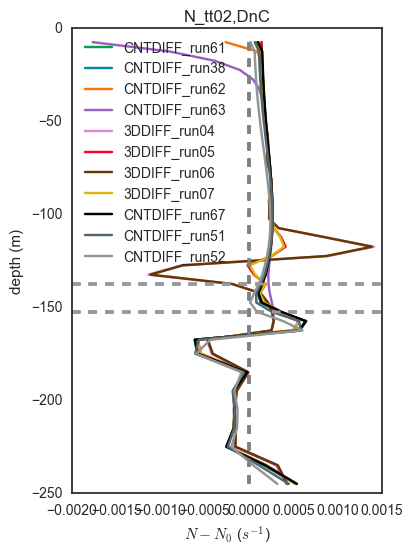

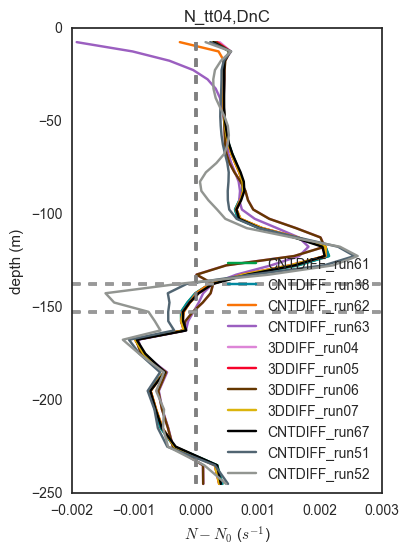

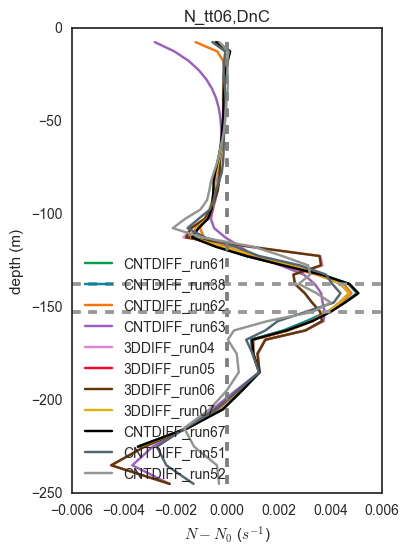

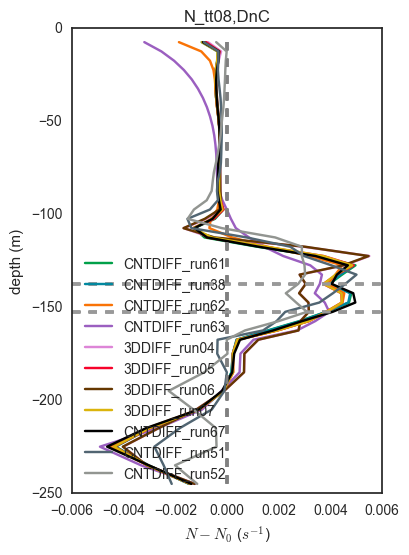

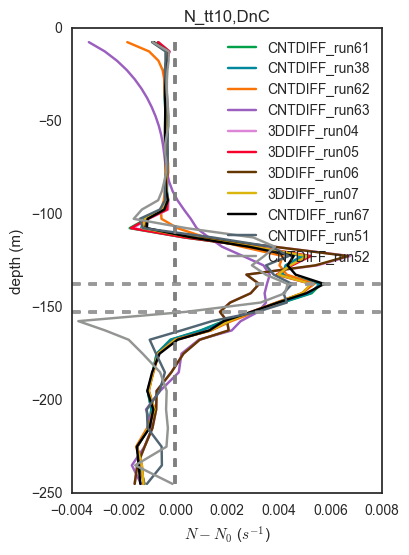

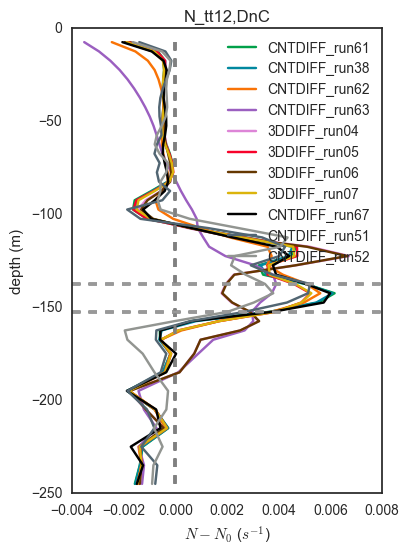

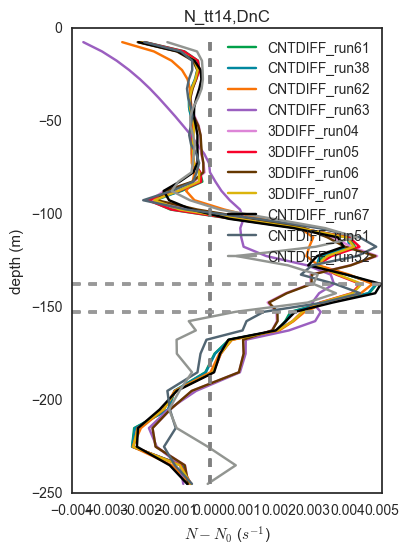

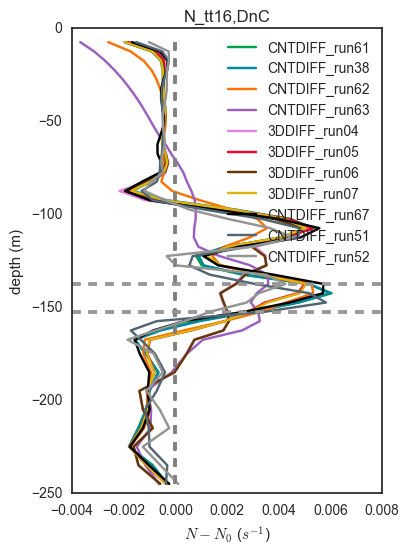

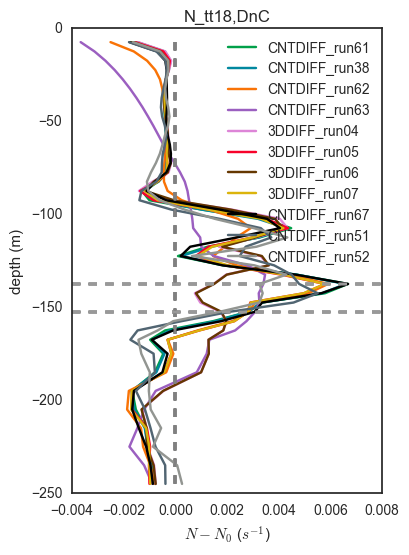

In [7]:
expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           ]


colours = ["emerald",#
          "teal blue",# 
          "orange",# 
          "amethyst",# 
          "lavender pink",
          "cherry red",
          "brown",
          "gold",
          'black',
          'slate',
          'grey']# 

colour_pal = sns.xkcd_palette(colours)

stname = 'DnC'
keys = ['N_tt00','N_tt02','N_tt04','N_tt06','N_tt08','N_tt10','N_tt12','N_tt14','N_tt16','N_tt18']

for key in keys:
    fig,ax = plt.subplots(1,1,figsize=(4,6))
    figHand = plotN_profile(ax,stname,expNames,colour_pal,key,'N_tt00')
    #figName = ('results/figures/BuoyancyFrequency/N_%s.png' %stname)
    #figHand.savefig(figName,format='png')
    
    ax.legend(loc=0)   
    plt.show()

### Maximum N below 132.5 m

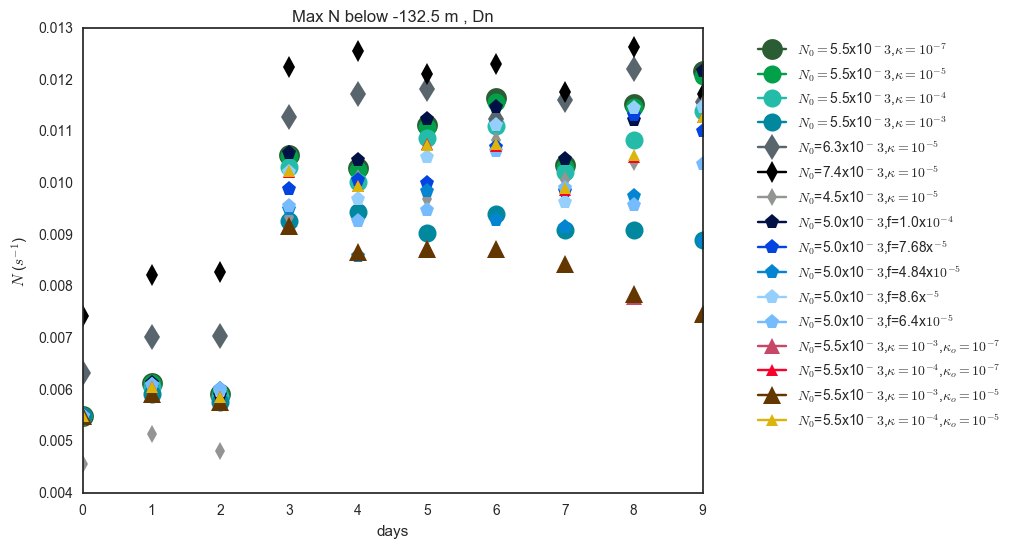

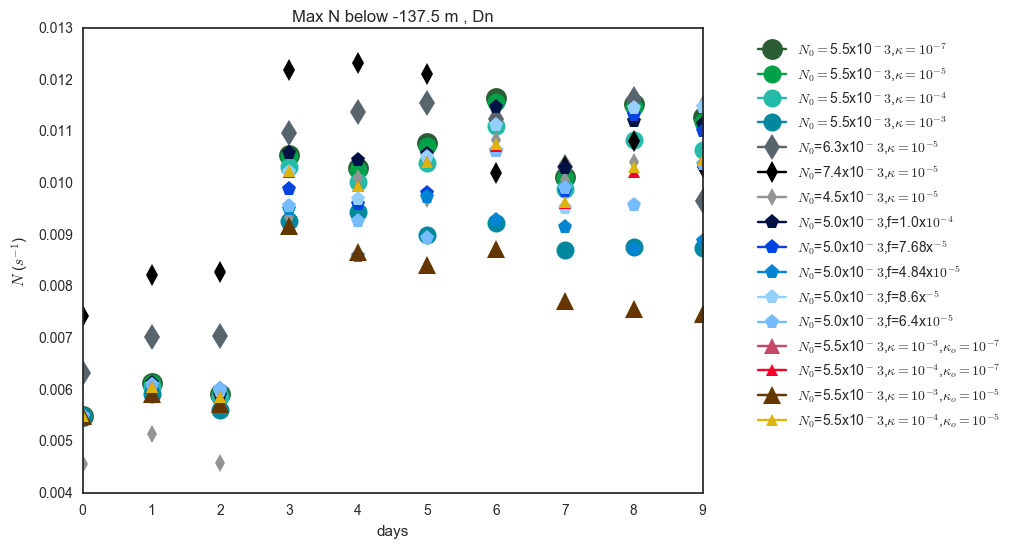

In [8]:
# Plot specifications per experiment

keys = ['N_tt00','N_tt02','N_tt04','N_tt06','N_tt08','N_tt10','N_tt12','N_tt14','N_tt16','N_tt18']
key0 = 'N_tt00'

markersizes = [15,13,13,13,13,11,9,11,11,11,11,11,11,9,13,9,]
markerstyle = ['o','o','o','o','d',"d","d",'p','p','p','p','p','^','^','^','^']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.3x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=7.4x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=4.5x10$^-3$,$\kappa=10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=1.0x$10^{-4}$',
              '$N_0$=5.0x10$^-3$,f=7.68x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=4.84x$10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=8.6x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=6.4x$10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold"]# 

# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
times = range(10)
for runs,col,ms,mm in zip(expNames,colours,markersizes,markerstyle):
    
    for key,tt in zip(keys,times):
        
        filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
        df = pd.read_csv(filename1)
        df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
            
        plt1, = ax.plot(tt,max(df_anom[key][26:]),marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
        
        ax.set_title('Max N below %1.1f m , Dn' %rc[26])
        ax.set_ylabel('$N$ ($s^{-1}$)')
        ax.set_xlabel('days')

    labels.append(plt1)
    
    
    ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()

fig,ax = plt.subplots(1,1,figsize=(8,6))

for runs,col,ms,mm in zip(expNames,colours,markersizes,markerstyle):
    
    for key,tt in zip(keys,times):
        
        filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
        df = pd.read_csv(filename1)
        df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
            
        plt1, = ax.plot(tt,max(df_anom[key][27:]),marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
        
        ax.set_title('Max N below %1.1f m , Dn' %rc[27])
        ax.set_ylabel('$N$ ($s^{-1}$)')
        ax.set_xlabel('days')

    labels.append(plt1)
    
    
    ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()

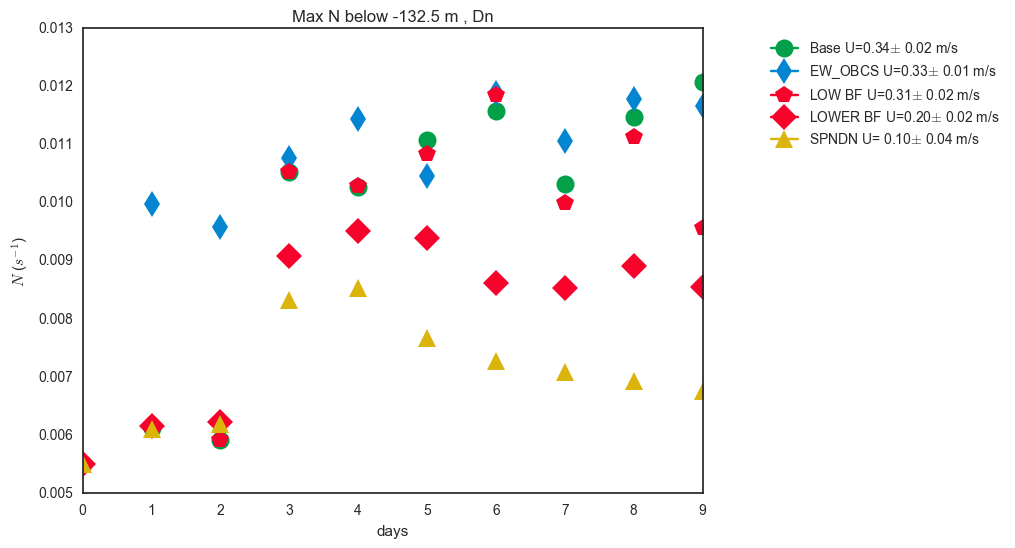

In [9]:
# Plot specifications per experiment

keys = ['N_tt00','N_tt02','N_tt04','N_tt06','N_tt08','N_tt10','N_tt12','N_tt14','N_tt16','N_tt18']
key0 = 'N_tt00'

markersizes = [13,13,13,13,13]
markerstyle = ['o','d','p','D','^']

expNames = ['CNTDIFF_run38',
           'EW_OBCS_run06',
           'LESS_BF_run01',
           'LESS_BF_run03',
           'FORCING_SPNDN_run01'
           ]
         

exp_labels = ['Base U=0.34$\pm$ 0.02 m/s',
              'EW_OBCS U=0.33$\pm$ 0.01 m/s',
              'LOW BF U=0.31$\pm$ 0.02 m/s',
              'LOWER BF U=0.20$\pm$ 0.02 m/s',
              'SPNDN U= 0.10$\pm$ 0.04 m/s'
             ]

colours = ["emerald",#
           "cerulean",
           "cherry red",
           "cherry red",
           "gold"]# 



U = np.array([0.34,0.33,0.31,0.20,0.10])


# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
times = range(10)
for runs,col,ms,mm in zip(expNames,colours,markersizes,markerstyle):
    
    for key,tt in zip(keys,times):
        
        filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
        df = pd.read_csv(filename1)
        df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
            
        plt1, = ax.plot(tt,max(df_anom[key][26:]),marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
        
        ax.set_title('Max N below %1.1f m , Dn' %rc[26])
        ax.set_ylabel('$N$ ($s^{-1}$)')
        ax.set_xlabel('days')

    labels.append(plt1)
    
    
    ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()



In [10]:
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'


maxN = np.empty(len(expNames))
stdN = np.empty(len(expNames))
ii=0  
for runs in expNames:
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    maxN[ii] = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdN[ii] = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    ii=ii+1

L = 6400.0
U = 0.36
R = 5000.0

No = np.array([5.5E-3,6E-3,
              5.5E-3,
              5.5E-3,
              5.5E-3,
              5.5E-3,
              5.5E-3,
              7.4E-3,
              4.5E-3,
              ])
f = np.array([9.66E-5,9.66E-5,
              1E-4,
              7.68E-5,
              4.84E-5,
              8.6E-5,
              6.4E-5,
              9.66E-5,
              9.66E-5,
              ])
Dh = f*L/(No)
Z =  (1.4*U*(L**(1/2)))/(No*(R**(1/2)))/2
Ro = U/(f*L)

func = np.polyfit(No*Dh/(Z), maxN, 1)



LinFit = np.poly1d(func)

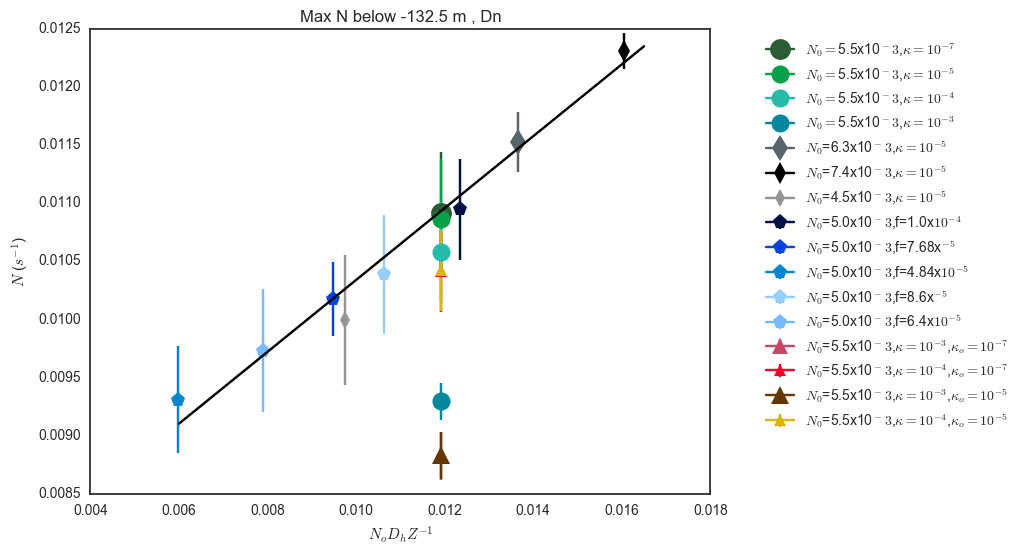

In [11]:
# Plot specifications per experiment
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

markersizes = [15,13,13,13,13,11,9,11,11,11,11,11,11,9,13,9,]
markerstyle = ['o','o','o','o','d',"d","d",'p','p','p','p','p','^','^','^','^']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.3x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=7.4x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=4.5x10$^-3$,$\kappa=10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=1.0x$10^{-4}$',
              '$N_0$=5.0x10$^-3$,f=7.68x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=4.84x$10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=8.6x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=6.4x$10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold"]# 



# Constants and scales
L = 6400.0
U = 0.36
R = 5000.0
g=9.81
W = 13000
Hs = 150.0
Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,6.3E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3])
fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,])
Dhs = fs*L/(Nos)
Zs =  (1.4*U*(L**(1/2)))/(Nos*(R**(1/2)))/2
Bus = Nos*W/(fs*L)
Ros = U/(fs*W)




# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
x_fit = np.linspace(0.006, 0.0165, 50)

for runs,col,ms,mm,Dh,Z,No,Ro in zip(expNames,colours,markersizes,markerstyle,Dhs,Zs,Nos,Ros):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar(((No*Dh)/(Z)),meanMax,yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N$ ($s^{-1}$)')
    ax.set_xlabel('$N_o D_h Z^{-1}$')

    labels.append(plt1)
    
plt2 = ax.plot(x_fit,LinFit(x_fit),'-k')
           
ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()



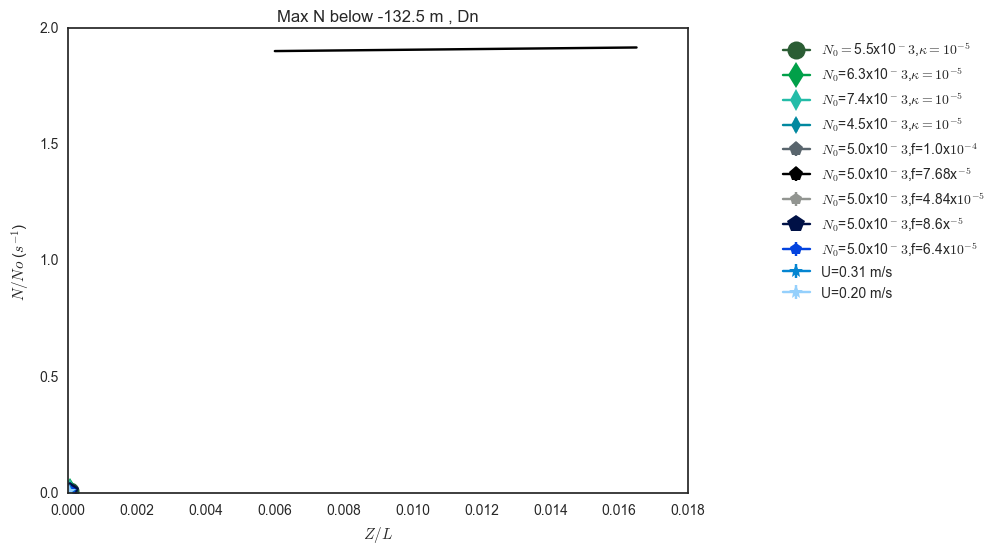

In [22]:
# Plot specifications per experiment
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

markersizes = [13,13,11,9,11,11,9,13,9,10,10]
markerstyle = ['o','d',"d","d",'p','p','p','p','p','*','*']

expNames = ['CNTDIFF_run38',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           'LESS_BF_run01',
           'LESS_BF_run03',]
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=6.3x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=7.4x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=4.5x10$^-3$,$\kappa=10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=1.0x$10^{-4}$',
              '$N_0$=5.0x10$^-3$,f=7.68x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=4.84x$10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=8.6x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=6.4x$10^{-5}$',
              'U=0.31 m/s',
              'U=0.20 m/s',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold",
          "red",
          "dark red"]# 



# Constants and scales
L = 6400.0
U = 0.36
R = 5000.0
g=9.81
W = 13000
Hs = 150.0
Nos = np.array([5.5E-3,6.3E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3])
fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5])
Us = np.array([0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,0.34,
               0.31,0.20])
Kvs = np.array([1E-5,
                1E-5,1E-5,1E-5,1E-5,
                1E-5,1E-5,1E-5,1E-5,1E-5,
                1E-5,1E-5])


Dhs = fs*L/(Nos)
Bus = Nos*W/(fs*L)
Ros = Us/(fs*R)

Fs = Ros/(0.9+Ros)

# Fit

keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'


maxN = np.empty(len(expNames))
stdN = np.empty(len(expNames))
ii=0  

for runs in expNames:
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    maxN[ii] = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdN[ii] = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    ii=ii+1

func2 = np.polyfit(((Fs*fs*Us*L)**(0.5))/(Nos*L), maxN/No, 1)

LinFit = np.poly1d(func2)


# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
x_fit = np.linspace(0.006, 0.0165, 50)

for runs,col,ms,mm,u,f,F,No,kv in zip(expNames,colours,markersizes,markerstyle,Us,fs,Fs,Nos,Kvs):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar(((f*u*F*L)**(0.5))/(L),meanMax,yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N/No$ ($s^{-1}$)')
    ax.set_xlabel('$Z/L$')

    labels.append(plt1)

plt2 = ax.plot(x_fit,LinFit(x_fit),'-k')

ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
#ax.set_xscale('log')    

plt.show()



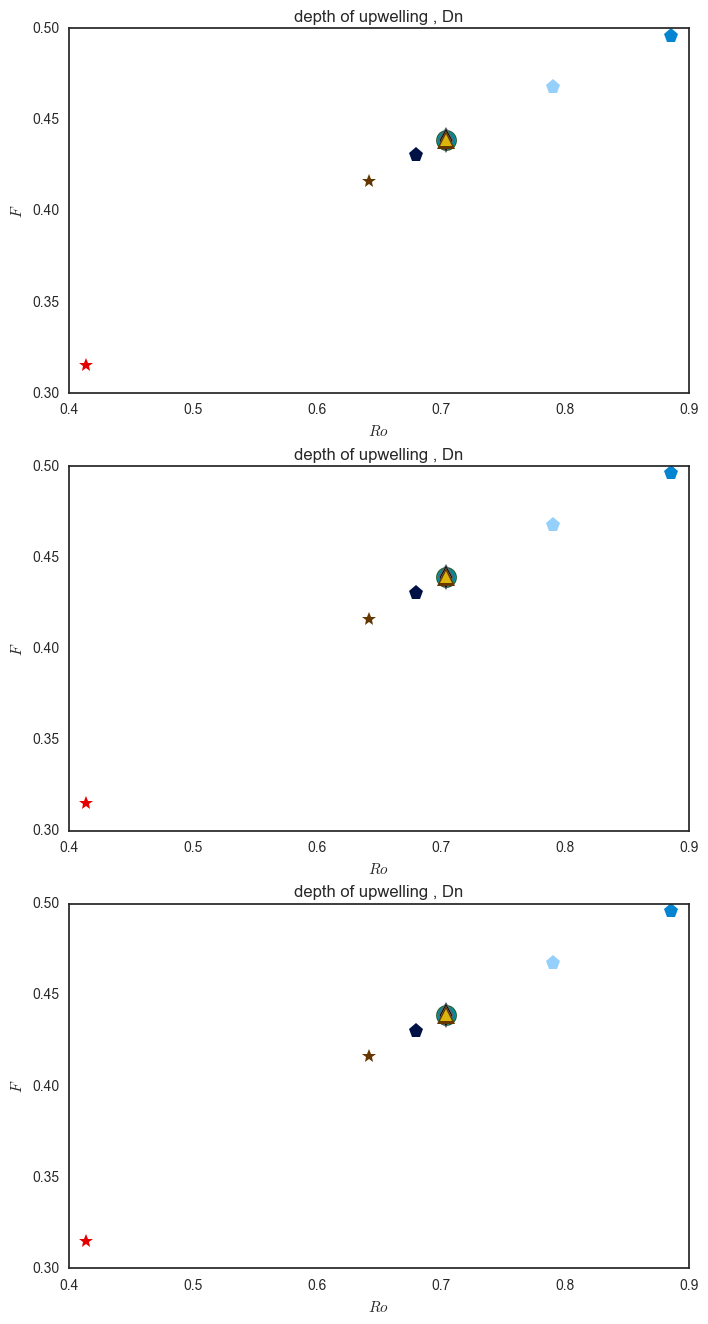

In [89]:
# Plot specifications per experiment
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

markersizes = [15,13,13,13,13,11,9,11,11,11,11,9,13,9,10,10]
markerstyle = ['o','o','o','o','d',"d","d",'p','p','p','^','^','^','^','*','*']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run69',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07',
           'LESS_BF_run01',
           'LESS_BF_run03',]
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.3x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=7.4x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=4.5x10$^-3$,$\kappa=10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=1.0x$10^{-4}$',
              '$N_0$=5.0x10$^-3$,f=7.68x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=8.6x$^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
              'U=0.31 m/s',
              'U=0.20 m/s',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           "navy blue",
           "cerulean",
           "light blue",
           "deep rose",
          "cherry red",
          "brown",
          "gold",
          "brown",
          "red",
          "dark red"]# 



# Constants and scales
L = 6400.0
U = 0.34
R = 5000.0
g=9.81
W = 13000
Hs = 150.0
Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                6.3E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3])
fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,8.6E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5])
Us = np.array([0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,
               0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,
               0.31,0.20])


Bus = Nos*W/(fs*L)
Ros = Us/(fs*W)

RoR = Us/(fs*R)
RoL = Us/(fs*L)

kv = np.array([1E-7,1E-5,1E-4,1E-3,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-3,1E-4,1E-3,1E-4,1E-5,1E-5,])

Fs = RoR/(0.9+RoR)

Dhs = (fs*L)/(Nos)

Zs =  ((fs*Us*Fs*L)/Nos**2)**(1/2)

Zsapprox =  (1.4*Us/Nos)*((L/R)**(1/2))

# Plot
fig,ax = plt.subplots(3,1,figsize=(8,16))
labels=[]
stname = 'DnC'
x_fit = np.linspace(0.006, 0.0165, 50)

for runs,col,ms,mm,Ro,F in zip(expNames,colours,markersizes,markerstyle,RoR,Fs):
    
       plt1 = ax[0].plot(Ro,F,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
ax[0].set_title('depth of upwelling , Dn' %rc[26])
ax[0].set_xlabel('$Ro$ ')
ax[0].set_ylabel('$F$ ')
    
for runs,col,ms,mm,Ro,F in zip(expNames,colours,markersizes,markerstyle,RoR,Fs):
    plt1 = ax[1].plot(Ro,F,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
ax[1].set_title('depth of upwelling , Dn' %rc[26])
ax[1].set_xlabel('$Ro$ ')
ax[1].set_ylabel('$F$ ')

for runs,col,ms,mm,Ro,F in zip(expNames,colours,markersizes,markerstyle,RoR,Fs):
    
    plt1 = ax[2].plot(Ro,F,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
ax[2].set_title('depth of upwelling , Dn' %rc[26])
ax[2].set_xlabel('$Ro$ ')
ax[2].set_ylabel('$F$ ')

plt.show()



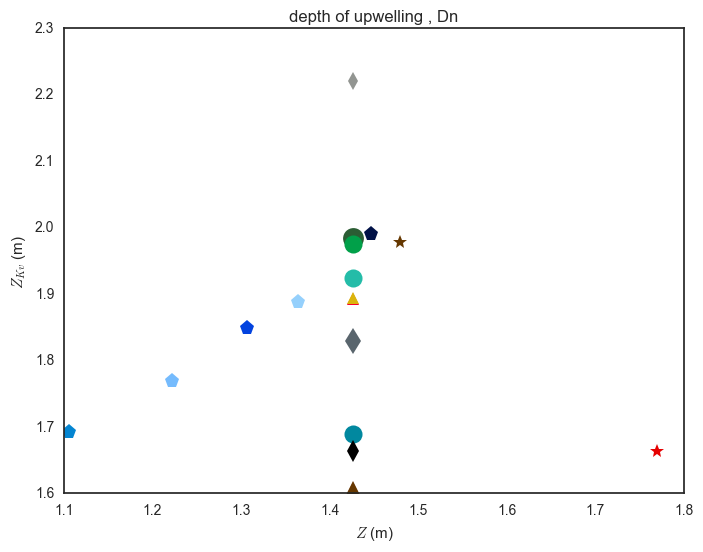

In [85]:
# Plot specifications per experiment
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

markersizes = [15,13,13,13,13,11,9,11,11,11,11,11,11,9,13,9,10,10]
markerstyle = ['o','o','o','o','d',"d","d",'p','p','p','p','p','^','^','^','^','*','*']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07',
           'LESS_BF_run01',
           'LESS_BF_run03',]
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.3x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=7.4x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=4.5x10$^-3$,$\kappa=10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=1.0x$10^{-4}$',
              '$N_0$=5.0x10$^-3$,f=7.68x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=4.84x$10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=8.6x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=6.4x$10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
              'U=0.31 m/s',
              'U=0.20 m/s',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold",
          "brown",
          "red",
          "dark red"]# 



# Constants and scales
L = 6400.0
U = 0.34
R = 5000.0
g=9.81
W = 13000
Hs = 150.0
Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,6.3E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3])
fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5])
Us = np.array([0.34,0.34,0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,0.34,0.31,0.20])


Bus = Nos*W/(fs*L)
Ros = Us/(fs*W)

RoR = Us/(fs*R)
RoL = Us/(fs*L)

kv = np.array([1E-7,1E-5,1E-4,1E-3,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-3,1E-4,1E-3,1E-4,1E-5,1E-5,])

Fs = RoR/(0.9+RoR)

Dhs = (fs*L)/(Nos)
Zs =  ((fs*Us*Fs*L)/Nos**2)**(0.5)
Znews = ((2*kv*L)/(Us*Fs)+(fs*Us*Fs*L/Nos**2))**(0.5)

# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
x_fit = np.linspace(0.006, 0.0165, 50)

for runs,col,ms,mm,Z,Znew,Dh,No in zip(expNames,colours,markersizes,markerstyle,Zs,Znews,Dhs,Nos):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
   
    plt1 = ax.plot((Dh/Z)**(0.5),meanMax/No,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
    ax.set_title('depth of upwelling , Dn' %rc[26])
    ax.set_ylabel('$Z_{Kv}$ (m)')
    ax.set_xlabel('$Z$ (m)')
    

plt.show()

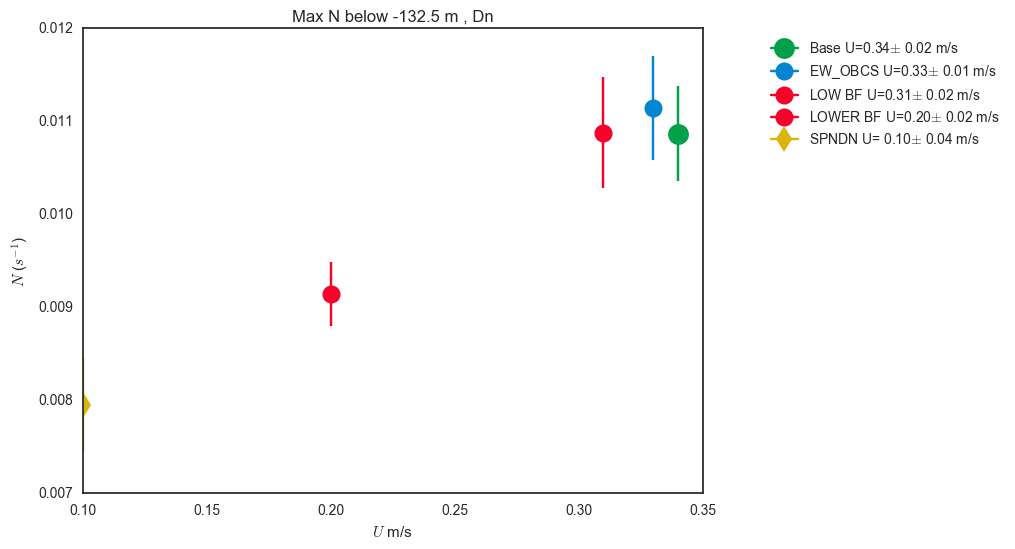

In [29]:
# Plot specifications per experiment
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

expNames = ['CNTDIFF_run38',
           'EW_OBCS_run06',
           'LESS_BF_run01',
           'LESS_BF_run03',
           'FORCING_SPNDN_run01'
           ]
         

exp_labels = ['Base U=0.34$\pm$ 0.02 m/s',
              'EW_OBCS U=0.33$\pm$ 0.01 m/s',
              'LOW BF U=0.31$\pm$ 0.02 m/s',
              'LOWER BF U=0.20$\pm$ 0.02 m/s',
              'SPNDN U= 0.10$\pm$ 0.04 m/s'
             ]

colours = ["emerald",#
           "cerulean",
           "cherry red",
           "cherry red",
           "gold"]# 



U = np.array([0.34,0.33,0.31,0.20,0.10])


# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
x_fit = np.linspace(0.006, 0.0165, 50)

for runs,col,ms,mm,uu in zip(expNames,colours,markersizes,markerstyle,U):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar(uu,meanMax,yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N$ ($s^{-1}$)')
    ax.set_xlabel('$U$ m/s')

    labels.append(plt1)
    

           
ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()



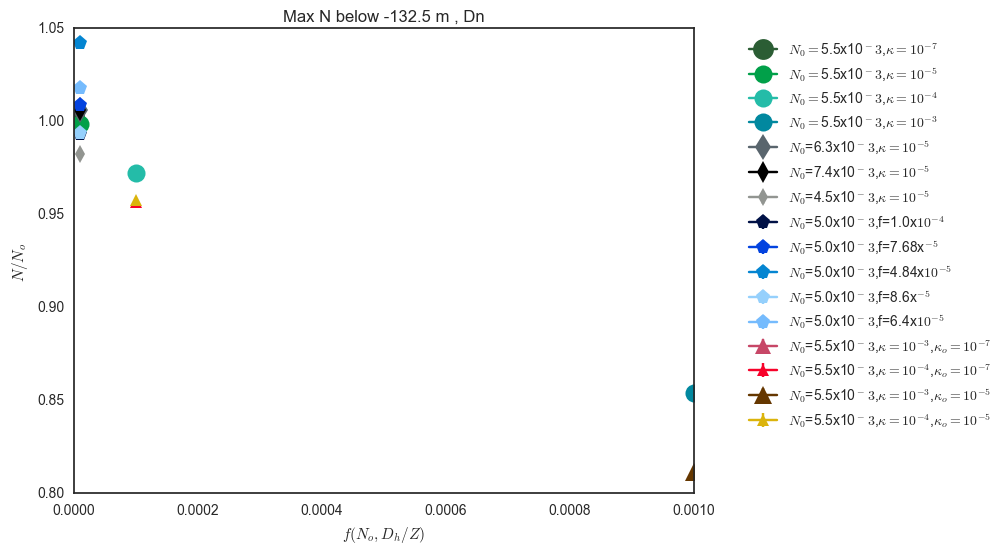

In [124]:
# Plot specifications per experiment
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'



markersizes = [15,13,13,13,13,11,9,11,11,11,11,11,11,9,13,9,]
markerstyle = ['o','o','o','o','d',"d","d",'p','p','p','p','p','^','^','^','^']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.3x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=7.4x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=4.5x10$^-3$,$\kappa=10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=1.0x$10^{-4}$',
              '$N_0$=5.0x10$^-3$,f=7.68x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=4.84x$10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=8.6x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=6.4x$10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold"]# 



# Constants and scales
L = 6400.0
U = 0.36
R = 5000.0
g=9.81
W = 13000
Hs = 150.0
Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,6.3E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3])
fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,])
Dhs = fs*L/(Nos)
Zs =  (1.4*U*(L**(1/2)))/(Nos*(R**(1/2)))/2
Bus = Nos*W/(fs*L)
Ros = U/(fs*W)
Kvs = np.array([1E-7,1E-5,1E-4,1E-3,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-3,1E-4,1E-3,1E-4])
# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'

for runs,col,ms,mm,Dh,Z,No,Ro,Kv in zip(expNames,colours,markersizes,markerstyle,Dhs,Zs,Nos,Ros,Kvs):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar(Kv,meanMax/((No*0.328*Dh/Z)+0.00697),yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N/N_o$ ')
    ax.set_xlabel('$f(N_o,D_h/Z)$')

    labels.append(plt1)
    
           
ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()



In [116]:
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           ]
            

# Constants and scales
L = 6400.0
U = 0.36
R = 5000.0
g=9.81
W = 13000
Hs = 150.0

Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,6.3E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,7.4E-3,4.5E-3,
                ])

fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,9.66E-5,9.66E-5,
               ])

kv = np.array([1E-7,1E-5,1E-4,1E-3,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5])

Dhs = fs*L/(Nos)
Zs =  (1.4*U*(L**(1/2)))/(Nos*(R**(1/2)))/2
Bus = Nos*W/(fs*L)
Ros = U/(fs*W)

t = 4.5*24*3600
Ktau = kv*t/(Zs/1.8)**2
maxN = np.empty(len(expNames))
stdN = np.empty(len(expNames))

ii=0  
for runs in expNames:
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    maxN[ii] = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdN[ii] = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    ii=ii+1


funcKv = np.polyfit((Nos*Dhs/(Zs))*(1-Kt), maxN, 1)
LinFitKv = np.poly1d(funcKv)

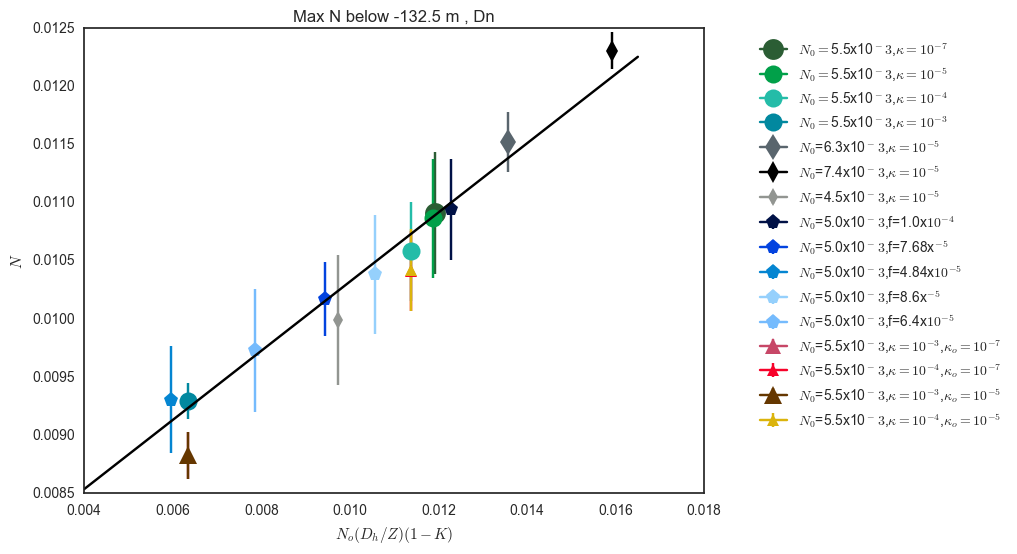

 
0.2974 x + 0.007347


In [118]:
# Plot specifications per experiment
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

markersizes = [15,13,13,13,13,11,9,11,11,11,11,11,11,9,13,9,]
markerstyle = ['o','o','o','o','d',"d","d",'p','p','p','p','p','^','^','^','^']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.3x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=7.4x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=4.5x10$^-3$,$\kappa=10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=1.0x$10^{-4}$',
              '$N_0$=5.0x10$^-3$,f=7.68x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=4.84x$10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=8.6x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=6.4x$10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold"]# 



# Constants and scales
L = 6400.0
U = 0.36
R = 5000.0
g=9.81
W = 13000
Hs = 150.0
Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,6.3E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3])
fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,])
kv = np.array([1E-7,1E-5,1E-4,1E-3,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-3,1E-4,1E-3,1E-4])
Dhs = fs*L/(Nos)
Zs =  (1.4*U*(L**(1/2)))/(Nos*(R**(1/2)))/2
Bus = Nos*W/(fs*L)
Ros = U/(fs*W)

t = 4.5*24*3600
Ktau = kv*t/(Zs/1.8)**2
# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'

x_fit = np.linspace(0.004, 0.0165, 50)

for runs,col,ms,mm,Dh,Z,No,Ro,Kt in zip(expNames,colours,markersizes,markerstyle,Dhs,Zs,Nos,Ros,Ktau):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar((No*(Dh/Z))*(1-Kt),meanMax,yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
    #print(Z)
    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N$ ')
    ax.set_xlabel('$N_o(D_h/Z)(1-K)$')

    labels.append(plt1)

plt2 = ax.plot(x_fit,LinFitKv(x_fit),'-k') 
           
ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()

print(LinFitKv)

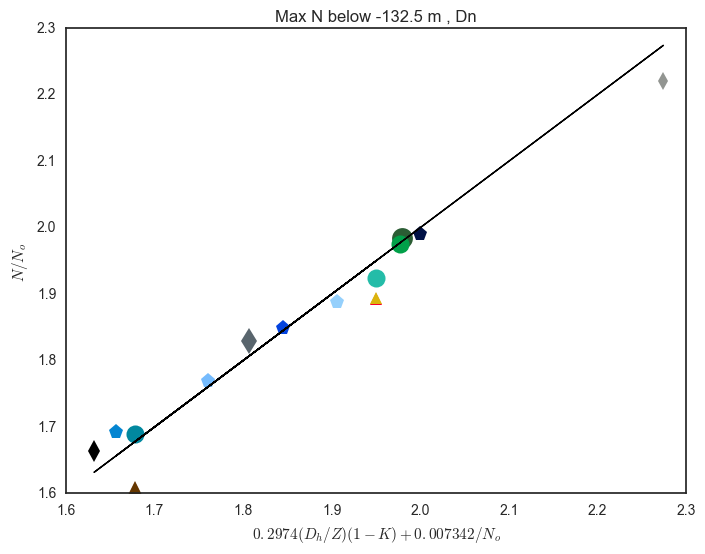

In [119]:
# Plot specifications per experiment
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

markersizes = [15,13,13,13,13,11,9,11,11,11,11,11,11,9,13,9,]
markerstyle = ['o','o','o','o','d',"d","d",'p','p','p','p','p','^','^','^','^']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.3x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=7.4x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=4.5x10$^-3$,$\kappa=10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=1.0x$10^{-4}$',
              '$N_0$=5.0x10$^-3$,f=7.68x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=4.84x$10^{-5}$',
              '$N_0$=5.0x10$^-3$,f=8.6x$^{-5}$',
              '$N_0$=5.0x10$^-3$,f=6.4x$10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold"]# 



# Constants and scales
L = 6400.0
U = 0.36
R = 5000.0
g=9.81
W = 13000
Hs = 150.0
Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,6.3E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3])
fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,])
kv = np.array([1E-7,1E-5,1E-4,1E-3,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-5,1E-3,1E-4,1E-3,1E-4])
Dhs = fs*L/(Nos)
Zs =  (1.4*U*(L**(1/2)))/(Nos*(R**(1/2)))/2
Bus = Nos*W/(fs*L)
Ros = U/(fs*W)

t = 4.5*24*3600
Ktau = kv*t/(Zs/1.8)**2
# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'

x_fit = np.linspace(0.004, 0.0165, 50)

for runs,col,ms,mm,Dh,Z,No,Ro,Kt in zip(expNames,colours,markersizes,markerstyle,Dhs,Zs,Nos,Ros,Ktau):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar(0.2974*(Dh/Z)*(1-Kt)+(0.007342/No),meanMax/No,yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
    
    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N/N_o$ ')
    ax.set_xlabel('$0.2974(D_h/Z)(1-K)+0.007342/N_o$')

    labels.append(plt1)
ax.plot(0.2974*(Dhs/Zs)*(1-Ktau)+(0.007342/Nos),0.2974*(Dhs/Zs)*(1-Ktau)+(0.007342/Nos),'-k',linewidth=1)       
plt.show()



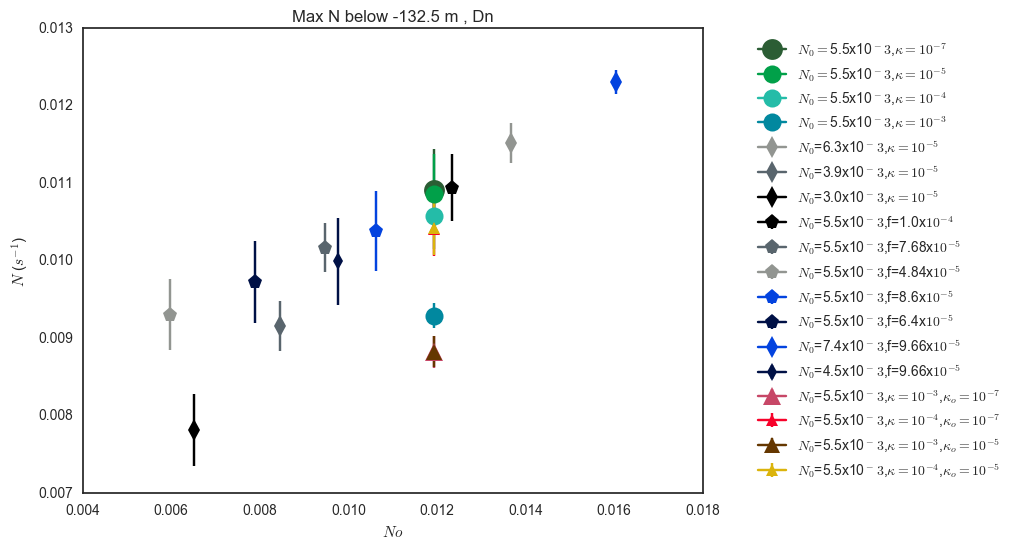

In [37]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
x_fit = np.linspace(0.006, 0.014, 50)

for runs,col,ms,mm,No,Dh,Z,Ro in zip(expNames,colours,markersizes,markerstyle,Nos,Dhs,Zs,Ros):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar((No)*(Dh/Z),meanMax,yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N$ ($s^{-1}$)')
    ax.set_xlabel('$No$')

    labels.append(plt1)
    
           
ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    
plt.show()

0.00549634212114 17080.7453416
0.00549634212114 17080.7453416
0.00549634212114 17080.7453416
0.00549634212114 17080.7453416
0.00632935512031 19565.2173913
0.00388660363046 12111.8012422
0.00305928088834 9316.77018634
0.00549634212114 16500.0
0.00549634212114 21484.375
0.00549634212114 34090.9090909
0.00549634212114 19186.0465116
0.00549634212114 25781.25
0.00743295895967 22981.3664596
0.00455888424306 13975.1552795
0.00549634212114 17080.7453416
0.00549634212114 17080.7453416
0.00549634212114 17080.7453416
0.00549634212114 17080.7453416


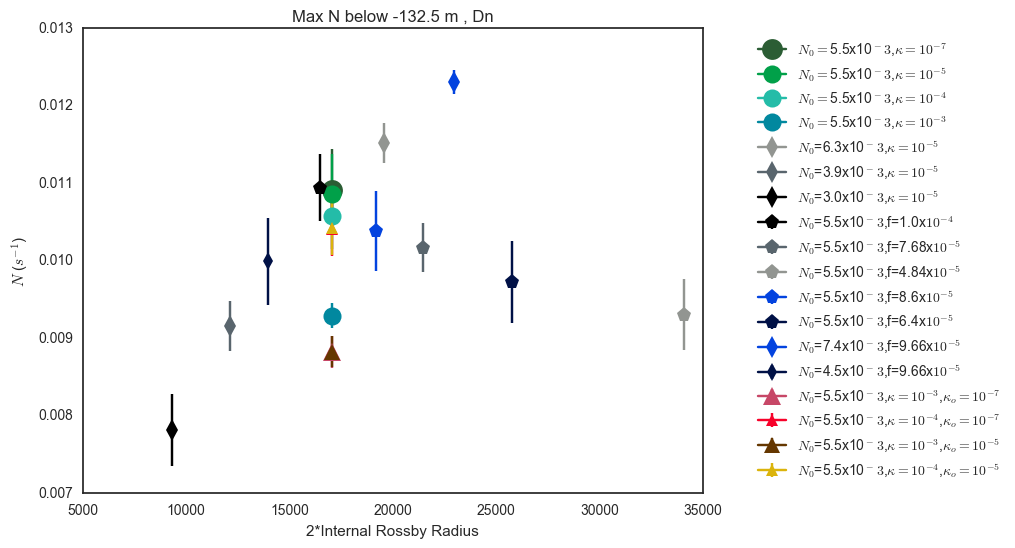

In [31]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
x_fit = np.linspace(0.006, 0.014, 50)

for runs,col,ms,mm,No,f in zip(expNames,colours,markersizes,markerstyle,Nos,fs):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar(2*((No*Hs)/(f)),meanMax,yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
    print(df[key0][0],2*(No*Hs)/(f))

    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N$ ($s^{-1}$)')
    ax.set_xlabel('2*Internal Rossby Radius')

    labels.append(plt1)
    
           
ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    
plt.show()



0.00549634212114 112.407272727
0.00549634212114 112.407272727
0.00549634212114 112.407272727
0.00549634212114 112.407272727
0.00632935512031 98.1333333333
0.00388660363046 158.523076923
0.00305928088834 206.08
0.00549634212114 116.363636364
0.00549634212114 89.3672727273
0.00549634212114 56.32
0.00549634212114 100.072727273
0.00549634212114 74.4727272727
0.00743295895967 83.5459459459
0.00455888424306 137.386666667
0.00549634212114 112.407272727
0.00549634212114 112.407272727
0.00549634212114 112.407272727
0.00549634212114 112.407272727


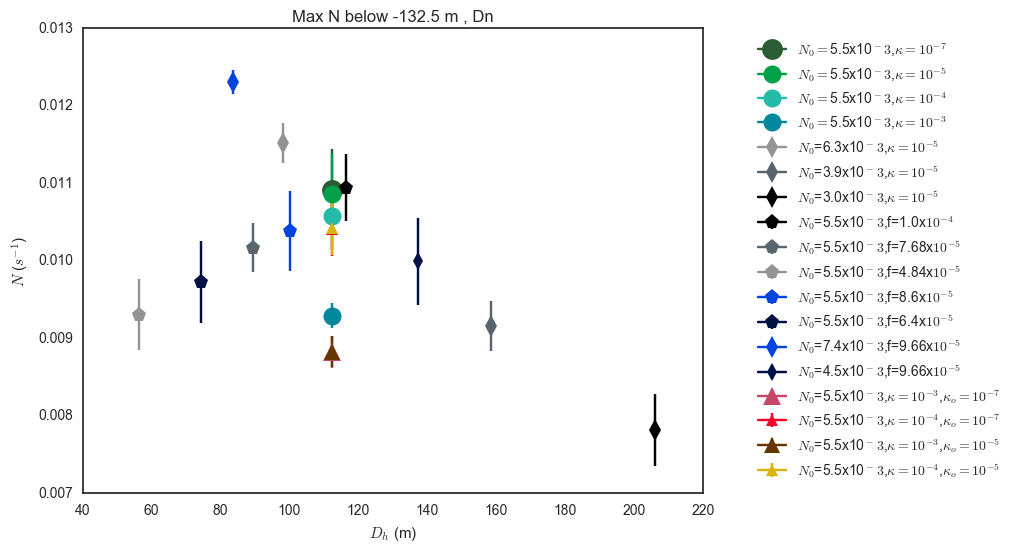

In [32]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
x_fit = np.linspace(0.006, 0.014, 50)

for runs,col,ms,mm,Dh in zip(expNames,colours,markersizes,markerstyle,Dhs):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar((Dh),meanMax,yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
    print(df[key0][0],Dh)

    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N$ ($s^{-1}$)')
    ax.set_xlabel('$D_h$ (m)')

    labels.append(plt1)
    
           
ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    
plt.show()


In [23]:
# Check weak to moderate flow assumption
f = 8.6E-5
#9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,
#               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,9.66E-5,
#               9.66E-5,9.66E-5,9.66E-5,9.66E-5,
RL = U/(f*L)
Ro = U/(f*R)
Rw = U/(f*W) # W=Wsb

F = ((0.9*Ro)/(1+(Ro/0.9)))**(1.5)*RL**(0.5)*Rw

print(f,F)

8.6e-05 0.06351453336716287


0.3214285714285714
0.55
